# Oranges vs. Grapefruit
https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit

캐글에서 데이터를 다운 받아 사용하신다면
코랩에 업로드를 하셔야 합니다.

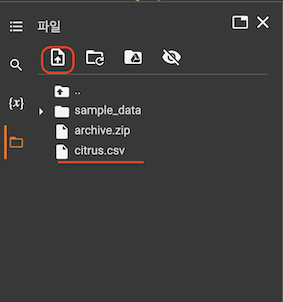

In [ ]:
import zipfile

data = zipfile.ZipFile('/content/archive.zip')
data.extractall('/content/')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
citrus = pd.read_csv('/content/citrus.csv')

In [ ]:
citrus.shape

In [ ]:
citrus.head()

In [ ]:
citrus.tail()

In [ ]:
orange = citrus.loc[citrus.name == 'orange']
orange.shape

In [ ]:
grapefruit = citrus.loc[citrus.name == 'grapefruit']
grapefruit.shape

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 오렌지를 지름과 무게로 나눔
plt.scatter(orange['diameter'], orange['weight'])
# 자몽을 지름과 무게로 나눔
plt.scatter(grapefruit['diameter'], grapefruit['weight'])

plt.xlabel('diameter')
plt.ylabel('weight')
plt.legend(['orange','grapefruit'])
plt.show()

In [ ]:
diameter = pd.Series.tolist(orange['diameter']) + pd.Series.tolist(grapefruit['diameter'])
weight = pd.Series.tolist(orange['weight']) + pd.Series.tolist(grapefruit['weight'])

In [ ]:
#fruit_data라는 함수에 d,w(각각 diameter과 weight의 약자)변수를 for문으로 반복, 각각 zip함수로 하나의 요소씩 넣는다. 
fruit_data = [[d,w] for d,w in zip(diameter, weight)]

#잘 들어갔는지 확인해본다.
print(fruit_data)

In [ ]:
#레이블(정답데이터)을 더미변수로 만들어준다. 
#0(오렌지)을 5000개(갯수만큼) + 1(자몽)을 5000개(갯수만큼)
fruit_target = [0]*5000 +[1]*5000

print(fruit_target)

In [ ]:
print(len(fruit_data))
print(len(fruit_target))

In [ ]:
index = np.arange(10000)
np.random.shuffle(index)

In [ ]:
fruit_data = np.array(fruit_data)
fruit_target = np.array(fruit_target)

In [ ]:
train_input = fruit_data[index[:8000]]
train_target = fruit_target[index[:8000]]

test_input = fruit_data[index[8000:]]
test_target = fruit_target[index[8000:]]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
kn.fit(train_input, train_target)

kn.score(test_input, test_target)

In [ ]:
test_predict = kn.predict(test_input)

In [ ]:
print(test_predict)
print(test_target)